In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
dataset = datasets.CIFAR10(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
batches = DataLoader(dataset, batch_size=64, shuffle=True)

Files already downloaded and verified


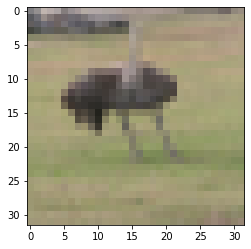

In [3]:
img, label = dataset[42]
plt.imshow(img.permute(1, 2, 0))

In [4]:
# VAR[X] = E[X**2] - E[X]**2
# STD[X] = VAR[X]**0.5
def get_mean_and_std(batches):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0

    for data, _ in batches:
        channels_sum += torch.mean(data, dim = [0, 2, 3]) # 1 -> channel dimension
        channels_squared_sum += torch.mean(data ** 2, dim = [0, 2, 3])
        num_batches += 1

    mean = channels_sum / num_batches
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5 

    return mean, std

In [5]:
mean, std = get_mean_and_std(batches)
mean, std

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [6]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize(mean, std)])

In [7]:
dataset = datasets.CIFAR10(root="dataset/", train=True, transform=transform, download=True)
batches = DataLoader(dataset, batch_size=64, shuffle=True)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


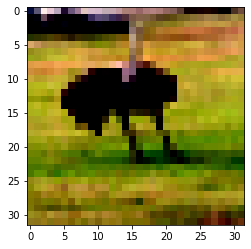

In [8]:
img, label = dataset[42]
plt.imshow(img.permute(1, 2, 0))

In [9]:
mean, std = get_mean_and_std(batches)
mean, std

(tensor([-0.0002, -0.0002, -0.0002]), tensor([1.0001, 1.0001, 1.0001]))